In [1]:

#NER ANALYSIS TOWNHALL

In [2]:
import pandas as pd

In [3]:

# Read csv file
file=('Resources/town_hall.csv')
first_df=pd.read_csv(file)
first_df.head()

,tweet,replies_count,retweets_count,likes_count,candidate,tweet_length,Subjectivity,Polarity,Sentiment
0,In 2016 Massachusetts Gov Charlie Baker sat ou...,38,41,144,Biden,25,0.90,0.5,Positive
1,Obama came in after Bush Trump didn inherit t...,1,0,0,Biden,46,0.55,0.0,Neutral
2,People voting against their best interest is ...,0,0,8,Biden,24,0.15,0.4,Positive
3,Joe is senile Sorry But also he a crook But s...,0,0,0,Biden,19,1.00,-0.5,Negative
4,hope the media stops reporting his every utte...,0,0,1,Biden,9,0.00,0.0,Neutral


In [4]:
# Separating entire dataset to sentiments for Trump and Biden
biden_sentiment=first_df[(first_df['candidate']=='Biden')]
trump_sentiment=first_df[(first_df['candidate']=='Trump')]

In [5]:
# As datasets are large, we decided to choose a fraction of each dataset
biden_sentiment=biden_sentiment.sample(frac = 0.1)
trump_sentiment=trump_sentiment.sample(frac = 0.1)

In [6]:
import spacy
from spacy import displacy

In [7]:
nlp=spacy.load('en_core_web_sm')

In [8]:
entities = []
labels = []
def ner_table(row):
    ner_table=row['tweet']
    for sentence in ner_table:
        doc=nlp(sentence)
        for ent in doc.ents:
            entities.append(ent)
            labels.append(ent.label_)
    return ('NER Complete')

In [9]:
# Running NER function on biden database
ner_table(biden_sentiment)

'NER Complete'

In [10]:

# Creating dataframe with entities and labels columns
df_biden = pd.DataFrame({'Entities':entities,'Labels':labels})
df_biden

,Entities,Labels
0,"(Donald, Trump)",PERSON
1,"(Joe, Biden)",PERSON
2,"(Chris, Wallace)",PERSON
3,(WANTED),ORG
4,(Damn),PERSON
...,...,...
19092,(Biden),LOC
19093,"(Joe, Biden)",PERSON
19094,"(Supreme, Court)",ORG
19095,(Uhhhhh),PERSON


In [11]:
# Grouping by Labels
df_biden_labels = df_biden.groupby(["Labels"]).count()["Entities"]
df_biden_labels

Labels
CARDINAL       1691
DATE           1605
EVENT            57
FAC             233
GPE            1795
LANGUAGE          8
LAW              68
LOC             458
MONEY            66
NORP           1387
ORDINAL         217
ORG            3185
PERCENT          14
PERSON         7581
PRODUCT         119
QUANTITY         34
TIME            415
WORK_OF_ART     164
Name: Entities, dtype: int64

In [12]:
# Creating dataframe from sorted table
df = pd.DataFrame(df_biden_labels)
df

,Entities
Labels,
CARDINAL,1691
DATE,1605
EVENT,57
FAC,233
GPE,1795
LANGUAGE,8
LAW,68
LOC,458
MONEY,66


In [13]:
# Sorting Labels by count
df=df.sort_values(["Entities"], ascending=False)
df

,Entities
Labels,
PERSON,7581
ORG,3185
GPE,1795
CARDINAL,1691
DATE,1605
NORP,1387
LOC,458
TIME,415
FAC,233


In [14]:
# Only using the top 10 Labels
biden_labels=df.head(10)
biden_labels

,Entities
Labels,
PERSON,7581
ORG,3185
GPE,1795
CARDINAL,1691
DATE,1605
NORP,1387
LOC,458
TIME,415
FAC,233


In [15]:
# Import Dependency to plot bar chart
import matplotlib.pyplot as plt

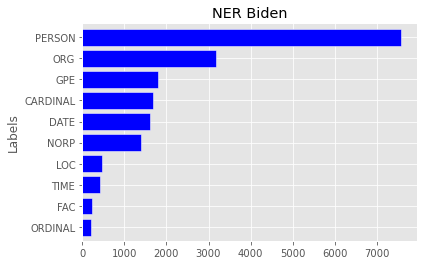

In [16]:
plt.style.use('ggplot')
biden_labels.plot(kind='barh', legend= False, color='blue', edgecolor='white',
                  width=0.8, title='Biden NER')
plt.gca().invert_yaxis()
plt.title('NER Biden')
plt.show()

In [17]:

# Choose one at a time
# spacy.explain("PERSON")
# spacy.explain("ORG")
# spacy.explain("GPE")
# spacy.explain("CARDINAL")
# spacy.explain("NORP")
# spacy.explain("DATE")
# spacy.explain("TIME")
# spacy.explain("LOC")
# spacy.explain("ORDINAL")
# spacy.explain("FAC")

In [18]:

# Running NER function on biden database
ner_table(trump_sentiment)

'NER Complete'

In [19]:
# Creating dataframe with entities and labels columns
df_trump = pd.DataFrame({'Entities':entities,'Labels':labels})
df_trump

,Entities,Labels
0,"(Donald, Trump)",PERSON
1,"(Joe, Biden)",PERSON
2,"(Chris, Wallace)",PERSON
3,(WANTED),ORG
4,(Damn),PERSON
...,...,...
39496,"(vile, wannabe)",PERSON
39497,(million),CARDINAL
39498,"(Andrew, Cuomo)",PERSON
39499,(Trump),PERSON


In [20]:

# Grouping by Labels
df_trump_labels = df_trump.groupby(["Labels"]).count()["Entities"]
df_trump_labels

Labels
CARDINAL        4010
DATE            3455
EVENT            135
FAC              435
GPE             3838
LANGUAGE          22
LAW              149
LOC              999
MONEY            149
NORP            3146
ORDINAL          441
ORG             7493
PERCENT           30
PERSON         13631
PRODUCT          298
QUANTITY          70
TIME             889
WORK_OF_ART      311
Name: Entities, dtype: int64

In [21]:
# Creating dataframe from sorted table
df = pd.DataFrame(df_trump_labels)
df

,Entities
Labels,
CARDINAL,4010
DATE,3455
EVENT,135
FAC,435
GPE,3838
LANGUAGE,22
LAW,149
LOC,999
MONEY,149


In [22]:

# Sorting Labels by count
df=df.sort_values(["Entities"], ascending=False)
df

,Entities
Labels,
PERSON,13631
ORG,7493
CARDINAL,4010
GPE,3838
DATE,3455
NORP,3146
LOC,999
TIME,889
ORDINAL,441


In [23]:
# Only using the top 10 Labels
trump_labels=df.head(10)
trump_labels

,Entities
Labels,
PERSON,13631
ORG,7493
CARDINAL,4010
GPE,3838
DATE,3455
NORP,3146
LOC,999
TIME,889
ORDINAL,441


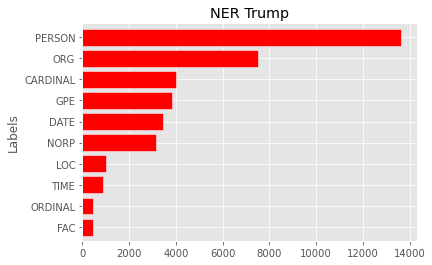

In [24]:

plt.style.use('ggplot')

trump_labels.plot(kind='barh', legend= False, color='red', edgecolor='white',
                  width=0.8)
plt.gca().invert_yaxis()
plt.title('NER Trump')
plt.show()

In [25]:

# Choose one at a time
# spacy.explain("PERSON")
spacy.explain("ORG")
# spacy.explain("GPE")
# spacy.explain("CARDINAL")
# spacy.explain("NORP")
# spacy.explain("DATE")
# spacy.explain("TIME")
# spacy.explain("LOC")
# spacy.explain("ORDINAL")
# spacy.explain("FAC")

'Companies, agencies, institutions, etc.'

In [26]:

biden_labels=biden_labels.rename(columns={"Entities": "Biden"})
biden_labels

,Biden
Labels,
PERSON,7581
ORG,3185
GPE,1795
CARDINAL,1691
DATE,1605
NORP,1387
LOC,458
TIME,415
FAC,233


In [27]:

trump_labels=trump_labels.rename(columns={"Entities": "Trump"})
trump_labels

,Trump
Labels,
PERSON,13631
ORG,7493
CARDINAL,4010
GPE,3838
DATE,3455
NORP,3146
LOC,999
TIME,889
ORDINAL,441


In [28]:
NER_Table = biden_labels.merge(trump_labels, on='Labels', how='left')
NER_Table

,Biden,Trump
Labels,,
PERSON,7581,13631
ORG,3185,7493
GPE,1795,3838
CARDINAL,1691,4010
DATE,1605,3455
NORP,1387,3146
LOC,458,999
TIME,415,889
FAC,233,435


In [29]:
NER_Table.to_csv(r'C:\Users\kevin\Documents\myrepo\Final-Project\Resources\Town_Hall_ner_table.csv', index = True, header=True)